# Heavy Tailed Universality Classes

Here we demonstrate how the Heavy Tailed / Power Law Universality Classes work for correlation matrices for our layer weight matrices

$$\mathbf{X}=\mathbf{W}^{T}{W}$$

Suppose $\mathbf{W}$ is a random matrix, we choose the matrix elements $W_{i,j}=x$ from a power law (i.e. Pareto) distibution, such that 

$$p(W_{i,j})=p(x)\sim\dfrac{1}{x^{1+\mu}},\;\;\mu>0$$

We would like to understand how the eigenvalues $\lambda$ of the correlation matrix , $\mathbf{X}\mathbf{v}=\lambda\mathbf{x}$, behave for different (classes of ) $\mu$. 

More specifically, we care about the Empirical Spectral Density $p_{N}(\lambda)$--our finite sample $N$ of the theoretically infinite, or asympotic $(N\rightarrow\infty)$, ESD $p(\lambda)$.

So let's first define these classes.

###  Power Law Distributions

 We use Power Laws to model the asympotic behavior of the tails of $p_{N}(x)$.  Although, to be precise, we have fairly small weight matrices, with  $N\sim\mathcal{}(100)$, so we may (also) be using the _central part_ of a Power Law $p(x)$ to describe the finite _tail_ $\lambda_{min}<\lambda\le\lambda_{max}$ of our ESD $p_{N}(\lambda)$
 
#### Heavy Tailed, Fat Tailed, and Truncated Power Law distributions

We define a _Heavy Tailed_ distribution $p(x)$ as one which the one of more power moments ( variance, skew, kurtosis, etc.) is not finite.  

Note:  sometimes (i.e. in physics) we only call $p(x)$ Heavy Tailed when the variance is infinite, and we say $p(x)$ is _Fat Tailed_ when the skew or kurtosis is infinite.  Some fat tailed distributions display power law behavior / decay in the tail but not everywhere.

_Heavy_ and/or _Fat Tailed_  distributions have a special place in Random Matrix Theory with the Four Moment Theorem of Tau:

https://terrytao.wordpress.com/tag/four-moment-theorem/

Here, distinguish between 3 classes

- $\mu<2$, $p_{N}(x)$ is a _Heavy Tailed_ (in the physics sense) a Power Law (PL) distribution.  It has infinite variance (lacks a finite second moment).  This also covers the class of $\alpha$-stable Levy distributions.  


- $2<\mu<4$,  $p_{N}(x)$ is a _Heavy_ or  _Fat Tailed_ Power Law distribution, having infinite fourth moment.  

  If we do an empirical fit, we may expect to observe these Fat Tails as a Trunctaed Power Law (TPL) because we modeling our empirical ESD with the central part of the Power Law distribution
   

-  $\mu>4$,  $p_{N}(x)$ has finite 4th moment.  


### Emprical Spectral Density (ESD) $p(\lambda)$

For each of the ranges of $\mu$, the ESD $\rho(\lambda)$ displays different, Universal behavior for _Heavy Tailed_ matrices $\mathbf{W}(\mu)$

Compute the eigenvalues $\lambda$ of $\mathbf{X}$, 

$$\mathbf{X}\mathbf{v}=\lambda\mathbf{x}$$

and form a histogram representing the Emprical Spectral Density (ESD) $p(\lambda)$

For any finite Heavy Tailed matrix $\mathbf{W}(\mu)$, defined above, the ESD is also heavy tailed, and be modeled as with Power Law (or Truncated Power Law)

$$p(\lambda)\sim\dfrac{1}{\lambda^{\alpha}}$$

either for the tail of the ESD, and/or the entire shape of the ESD curve.


#### Heavy Tailed Power Laws $\mu<2$

For small mu, we have $\alpha=1+\mu/2$, such that the ESD behaves like a Power Law

 $$\rho(\lambda)\sim\dfrac{1}{\lambda^{1+\mu/2}}$$


#### Fat Tailed Power Laws $2<\mu<4$

When $p(x)$ is a _Fat Tailed_ Power Law, the ESD has the same relation, but with very large _Finite Size Effects_.  For our small matrices, we still have the linear relation between $\alpha$ and $\mu$, of the form

 $$\rho(\lambda)\sim\dfrac{1}{\lambda^{A\mu+B}}$$
 
We can determine the constants $A, B$ with linear regression (for any specific $N,M$, shown below)
 
#### Marchenk Pastur + Power Law Tail $4<\mu$

In this case, the ESD resembles the more familir Marchenko Pastur result from Random Matrix Theory, but with a Power Law Tail (as opposed to Tracy Widom statistics at the MP bulk edge)

 $$p_{N}(\lambda)\sim\rho_{mp}(\lambda)+\rho_{PL}(\lambda)$$
 
That is, now the _Finite Size Effects_ arise only only the tail, causing the _Bulk Decay_

#### Boundary Cases $\mu=2, 4$   

There are boundary cases for $\mu=2$ and $\mu=4$ which are interesting but I do not discuss here because it would be very difficult to observe these results for small matrices.

#### PowerLaw fitting code

The currently a

https://github.com/jeffalstott/powerlaw


#### References

The problem was discussed by Soshnikov.  Later, these results were extended, to $0<\mu<4$, by Biroli et al., with heuristic arguments and numerical simulations:  https://arxiv.org/abs/cond-mat/0609070

and also see page 27
http://www-syscom.univ-mlv.fr/~najim/gdr/bouchaud.pdf

It was proven rigorously  Auffinger et al. https://arxiv.org/pdf/0811.1587.pdf

(see also https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.050/people/stelzer/DavisPfaffelStelzer2013.pdf)

But I am unaware of any discussion of the difference in finite size effects for $\mu<2$ vs $2<\mu<4$

We summarize the basic results and provide numerical simulations to help understand this



In [1]:
import numpy as np
import tensorflow as tf
import pickle, time
from copy import deepcopy
from shutil import copy
from tqdm import tqdm_notebook as tqdm
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb
import RMT_Util
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
print(sklearn.__version__)

/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


importing notebook from RMT_Util.ipynb


Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3
0.19.1


# Structure of Notebook

  ## 1.  ESD and Power Law fits for  each $\mu$ class
  ## 2. Overlap ESD for $\mu=1$ and $\mu=3$  and compare  
  ## 3. Test form of entire ESD $\rho_{N}(\lambda)\sim\dfrac{1}{\lambda^{A+B\mu}}$ for $\mu<4$

### ---------------------------------------------------------------------------------------------------------------------

## 1. Visualizing Power Law Disributions, and Matrix ESDs, for each class of $\mu$


### $\mu<2$   Pareto / Power Law Distributions

Notice:
- log-log plots are farily linear past after $x_{max}\sim 1$ value
- as $\mu$ decreases, the tail fills out.

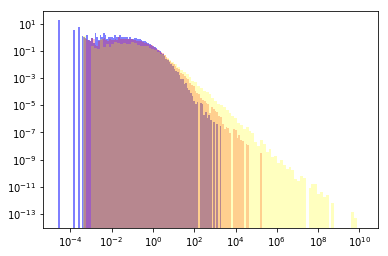

In [2]:
mu=1.2 # Blue
w = np.random.pareto(mu,size=10000)
bins = np.logspace(np.log10(np.min(w)), np.log10(np.max(w)), num=100)
plt.hist(w, bins=bins, density=True, log=True, color='blue', alpha=0.5);
plt.xscale('log')

mu=0.8 # Red
w = np.random.pareto(mu,size=10000)
bins = np.logspace(np.log10(np.min(w)), np.log10(np.max(w)), num=100)
plt.hist(w, bins=bins, density=True, log=True, color='red', alpha=0.25);
plt.xscale('log')

mu=0.4  # Yellow
w = np.random.pareto(mu,size=10000)
bins = np.logspace(np.log10(np.min(w)), np.log10(np.max(w)), num=100)
plt.hist(w, bins=bins, density=True, log=True, color='yellow', alpha=0.25);
plt.xscale('log')
plt.show()

## ESDs $\rho_{N}(\lambda)$ for  Heavy Tailed Matrices, $\mu<2$

### Log-Log Histogram plot and Power Law Fits

###  ESD for $\mu=0.4$

$(N,M=1000,300)$  

Notice tail extends way into $\lambda_{max}\sim 10^{25}$ and remains linear the entire time

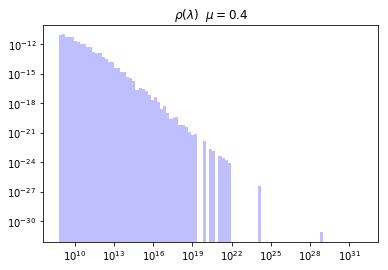

In [3]:
mu=0.4
W = np.random.pareto(mu,size=(300,1000))
Q = np.max(W.shape)/np.min(W.shape)
evals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True, color='blue', alpha=0.25);
plt.xscale('log')
plt.title(r'$\rho(\lambda)$  $\mu={}$'.format(mu))
plt.show()

#### PowerLaw fit  $\mu=0.4$  too small

The PowerLaw method does not work well here..it over-estimates $\alpha$, as expected, and it mis-identifies the distribution as a Truncated power law.


In [4]:
alpha, D, best_pl = RMT_Util.fit_powerlaw(evals)
print("alpha {:3g}, D {:3g}, best_pl  {}".format(alpha, D, best_pl))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha 1.17413, D 0.0301558, best_pl  PL


### ESD $\rho_{N}(\lambda), \; \mu=1.2$

The tail remains fat but only extends to $\lambda_{max}\sim 10^6$ and the log-log plot is linear


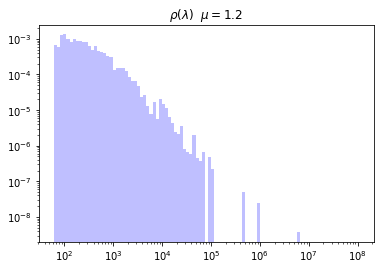

In [5]:
mu=1.2
W = np.random.pareto(mu,size=(300,1000))
Q = np.max(W.shape)/np.min(W.shape)
evals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True, color='blue', alpha=0.25);
plt.xscale('log')
plt.title(r'$\rho(\lambda)$  $\mu={}$'.format(mu))
plt.show()

#### Power Law fit:  much better

For small $\mu$, the PowerLaw method consistantly returns a best fit to be Truncated Power Law (TPL)


In [6]:
alpha, D, best_pl = RMT_Util.fit_powerlaw(evals)
print("alpha {:3g}, D {:3g}, best_pl  {}".format(alpha, D, best_pl))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha 1.55949, D 0.0658945, best_pl  PL


In [7]:
fit = powerlaw.Fit(evals, xmax=np.max(evals))
R, p = fit.distribution_compare('truncated_power_law', 'power_law', normalized_ratio=True)
R, p

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


(0.8367395361550066, 0.7949898724908424)

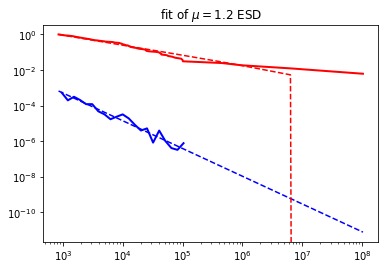

In [8]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
plt.title(r'fit of $\mu=1.2$ ESD')
plt.show()


## ESDs $\rho_{N}(\lambda)$ for  Heavy (Fat) Tailed Matrices, $2<\mu<4$

### Notice
- The maximum eigenvalue $\lambda_{max}\sim\mathcal{O}(10^2)$

- The log-log plot is nearly linear, but noisy

- The eigenvalue density is sparse for large $\lambda$

- and the tail drops off faster than linear

- The PowerLaw method consistantly returns a best fit to be Power Law (PL)



### ESD $\rho_{N}(\lambda), \; \mu=2.5$


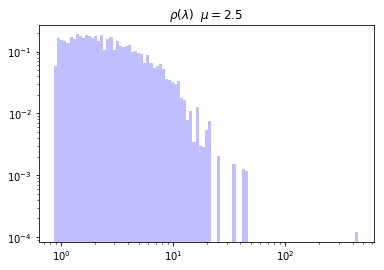

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/cha

alpha 3.08268, D 0.0401406, best_pl  PL


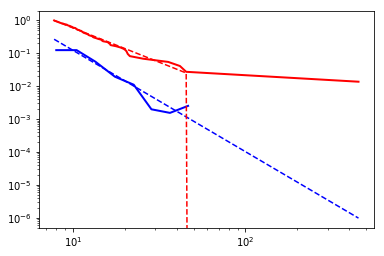

In [9]:
mu=2.5
W = np.random.pareto(mu,size=(300,1000))
Q = np.max(W.shape)/np.min(W.shape)
evals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True, color='blue', alpha=0.25);
plt.xscale('log')
plt.title(r'$\rho(\lambda)$  $\mu={}$'.format(mu))
plt.show()

RMT_Util.fit_and_plot_powerlaw(evals)

### ESD $\rho_{N}(\lambda), \; \mu=3.5$


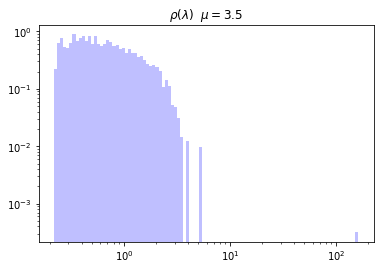

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/cha

alpha 3.72688, D 0.0794806, best_pl  PL


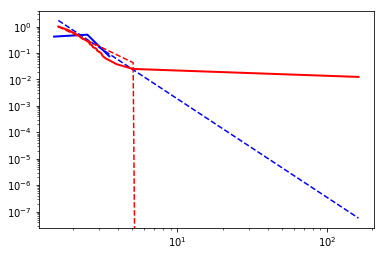

In [10]:
mu=3.5
W = np.random.pareto(mu,size=(300,1000))
Q = np.max(W.shape)/np.min(W.shape)
evals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True, color='blue', alpha=0.25);
plt.xscale('log')
plt.title(r'$\rho(\lambda)$  $\mu={}$'.format(mu))
plt.show() 

RMT_Util.fit_and_plot_powerlaw(evals)


## ESDs $\rho_{N}(\lambda)$ for Heavy (Fat)  Tailed Matrices, $4<\mu$

###  $\mu=5$

- Now the density dies abruptly at $\lambda_{max}\sim\mathcal{0}(1)$
- The is some finite-size noise, leading to a spuriously large maximum eigenvalue $\lambda_{max}\sim 10^2$


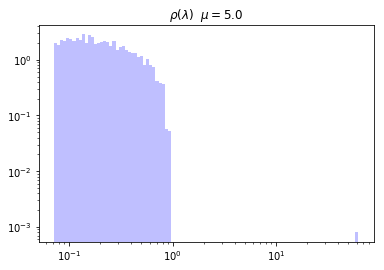

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha 3.71979, D 0.110217, best_pl  PL


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


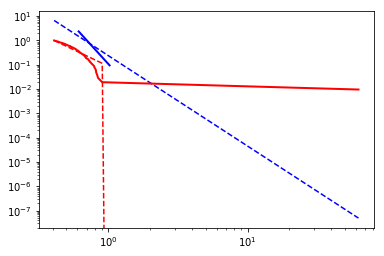

In [11]:
mu=5.0
W = np.random.pareto(mu,size=(300,1000))
Q = np.max(W.shape)/np.min(W.shape)
evals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(evals)), np.log10(np.max(evals)), num=100)
plt.hist(evals, bins=bins, density=True, log=True, color='blue', alpha=0.25);
plt.xscale('log')
plt.title(r'$\rho(\lambda)$  $\mu={}$'.format(mu))
plt.show() 

RMT_Util.fit_and_plot_powerlaw(evals)

## ------------------------------------------------------------------------------

## 2. Overlay ESDs for  $\mu=1.0$ and $\mu=3.0$ to compare how the ESDs decay on a log-log Histogram

Here we can really see the difference between the full Power Law ($\mu=1.0) and decaying ESD ($\mu=3.0$)

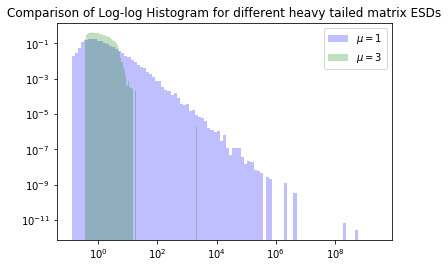

In [12]:
W = np.random.pareto(1.0,size=(3000,9000))
W = W/100
Q = np.max(W.shape)/np.min(W.shape)
evals_small, _ = RMT_Util.eigenspectrum(W)

W = np.random.pareto(3.0,size=(3000,9000))
W = W
Q = np.max(W.shape)/np.min(W.shape)
evals_medium, _ = RMT_Util.eigenspectrum(W)

bins = np.logspace(np.log10(np.min(evals_small)), np.log10(np.max(evals_small)), num=100)
plt.hist(evals_small, bins=bins, density=True, log=True, color='blue', alpha=0.25, label="$\mu=1$");
plt.xscale('log')
#plt.show()

bins = np.logspace(np.log10(np.min(evals_medium)), np.log10(np.max(evals_medium)), num=100)
plt.hist(evals_medium, bins=bins, density=True, log=True, color='green', alpha=0.25, label="$\mu=3$");
plt.xscale('log')
plt.title("Comparison of Log-log Histogram for different heavy tailed matrix ESDs")
plt.legend()

# plt.savefig("img/heavy-tailed-log-log-esds.png")

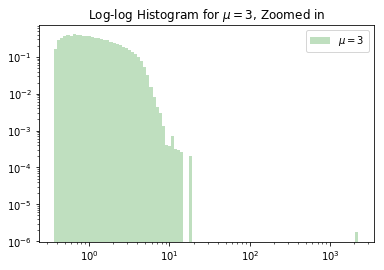

In [13]:
bins = np.logspace(np.log10(np.min(evals_medium)), np.log10(np.max(evals_medium)), num=100)
plt.hist(evals_medium, bins=bins, density=True, log=True, color='green', alpha=0.25, label="$\mu=3$");
plt.xscale('log')
plt.title("Log-log Histogram for $\mu=3$, Zoomed in")
plt.legend()

# plt.savefig("img/heavy-tailed-log-log-esd-zoomed.png")

## 3. Test form of entire ESD $\rho_{N}(\lambda)$

### $0<\mu<2\;\;\;$ Small finite size effects $\rho_{N}(\lambda)\sim\dfrac{1}{\lambda^{\mu+1/2}}$ 

### $2<\mu<4\;\;\;$ Large finite size effects $\rho_{N}(\lambda)\sim\dfrac{1}{\lambda^{A+B\mu}}$ 


This is pretty slow (> 4 hours), but it will let us see how $\mu$ relates to $\alpha$ for each Universality Class

In [14]:
def get_pareto_mat(mu, M=1000, Q=2):
    N = int(Q*M)
    W = np.random.pareto(mu,size=(M,N))
    evals, _ = RMT_Util.eigenspectrum(W)
    return W, evals

In [15]:
alphas = []
mus = np.sort(3*np.random.random_sample(100)+.5)
for mu in tqdm(mus):
      
    W, evals = get_pareto_mat(mu) 
    
    # skip best_PL distributional tests, just do fit
    fit = powerlaw.Fit(evals, xmax=np.max(evals))
    alphas.append(fit.alpha)

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calc

In [16]:
small_mu_alphas = []
A, B = 1.0, 0.5

for mu in mus:
    alpha = 1.0+0.5*mu
    small_mu_alphas.append(alpha)


### The theoretical fit $\alpha=1+0.5\mu$ works best for small $\mu<1.5$

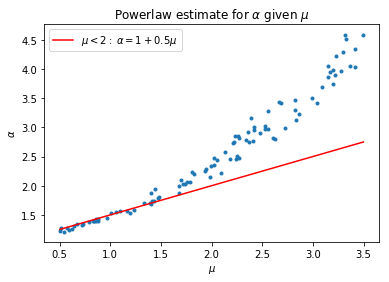

In [17]:
plt.scatter(mus, alphas, marker='.')  
plt.plot(mus, small_mu_alphas, color='red', label=r'$\mu<2:\;\alpha=1+0.5\mu$')
plt.xlabel('$\mu$')
plt.ylabel(r'$\alpha$')
plt.title(r'Powerlaw estimate for $\alpha$ given $\mu$ ')
plt.legend()

### Linear Regression fit for both $0<\mu<2$, which is not great, but looks best for smaller $\mu$

### and for $2<\mu<3.5$ , where our estimator is most accurate,


In [18]:
from sklearn import linear_model

In [19]:
x_small = np.array(mus).reshape(-1,1)[0:50]
y_small = np.array(alphas).reshape(-1,1)[0:50]

regr = linear_model.LinearRegression()
regr.fit(x_small,y_small)
y_small_pred = regr.predict(x_small)
print("alpha = {:.3g}mu + {:.3g}".format(regr.coef_[0][0], regr.intercept_[0]))


alpha = 0.743mu + 0.775


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [20]:
x_med = np.array(mus).reshape(-1,1)[50:]
y_med = np.array(alphas).reshape(-1,1)[50:]

regr = linear_model.LinearRegression()
regr.fit(x_med,y_med)
y_med_pred = regr.predict(x_med)
print("alpha = {:.3g}mu + {:.3g}".format(regr.coef_[0][0], regr.intercept_[0]))


alpha = 1.4mu + -0.523


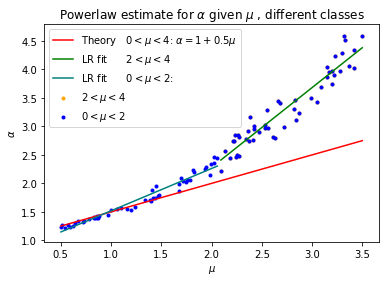

In [32]:
plt.plot(mus, small_mu_alphas,  color='red',    label=r'Theory   $0<\mu<4$: $\alpha=1+0.5\mu$')
plt.plot(x_med, y_med_pred,     color='green',  label=r'LR fit      $2<\mu<4$')
plt.scatter(x_med, y_med,       marker='.',     color='orange',   label=r'$2<\mu<4$')  
plt.plot(x_small, y_small_pred, color='teal',   label=r'LR fit      $0<\mu<2$:')
plt.scatter(mus, alphas,        marker='.',     color='blue',     label=r'$0<\mu<2$') 

plt.xlabel('$\mu$')
plt.ylabel(r'$\alpha$')
plt.title(r'Powerlaw estimate for $\alpha$ given $\mu$ , different classes')
plt.legend()

### How does $\rho_{N}(\lambda)$ depend on  M ?  

In [ ]:
alphas_M5k = []
#mus = np.sort(3*np.random.random_sample(100)+.5)
for mu in tqdm(mus):
      
    W, evals = get_pareto_mat(mu, M=5000) 
    
    # skip best_PL distributional tests, just do fit
    fit = powerlaw.Fit(evals, xmax=np.max(evals))
    alphas_M5k.append(fit.alpha)

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


In [ ]:
!pwd